# Redes Neurais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- TensorFlow e Keras;
- MLP;
- Treinando uma Rede Neural;
- MNIST;
- Exercícios

##   

## TensorFlow e Keras

Hoje vamos trabalhar com __as principais bibliotecas de redes neurais__, sendo a principal delas desenvolvida para Python, o [__TensorFlow__](https://www.tensorflow.org/).<br>
 <br>
<img src="https://www.ambientelivre.com.br/images/logos_open_source/tensorflow_logo.png" width=500>
 <br>
O __TensorFlow__ é um __framework extremamente poderoso__, mas que apresenta uma __sintaxe consideravelmeente complicada__. Para facilitar a vida e descomplicar Redes Neurais, que surgiu uma outra biblioteca construída encima do TensorFlow, conhecida como [__Keras__](https://keras.io/) <br>
 <br>
 <img src="https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_autoencoders_header.png" width=500>
 <br>
Diferente com o que estamos acostumados do _SciKit-Learn_, o __Keras__ é focada exclusivamente em Redes Neurais, oferencendo implementação de funções de alto nível, construindo essas redes de forma prática e simples!<br><br>
 
Claro que infelizmente até o __Keras__ têm suas limitações, quando precisar de modificações muito especificas, pode ser precise recorrer ao __TensorFlow__, apesar do __Keras__ possuir a __maioria das principais arquiteturas__ de Redes Neurais do __TensorFLow__ completamente integradas. 
<br><br>
Para instalar tanto o __TensorFlow__ quanto o __Keras__ basta seguir o código abaixo:

In [1]:
# Instalando as Bibliotecas
#!pip install tensorflow
#!pip install keras

## 

## Multi Layer Perceptron (MLP)

Vimos na aula anterior a respeito do _Perceptron_, onde montamos uma rede neural a partir de um neurônio. É importante o conceito do _Perceptron_ para justamente entender o que existe por trás das redes neurais mais complexas.

As redes __Multi Layer Perceptron__ (pela sigla MLP) sõa todos tipos de redes onde temos __diversas camadas de neurônios totalmente conectada__.

<br>

<img src="https://miro.medium.com/max/1400/1*piYTTh83qsQJVUMOZKmN5w.png" width= 600>

<br>

Conhecido já os principais conceitos por trás das redes neurais e agora fazendo a abstração para redes mais complexas, vamos treinar uma rede agora baseado no _MLP_.

##   

## Treinando uma Rede Neural

A "aprendizagem" da Rede Neural a partir dos dados se dá através de duas etapas, o **Forward Propagation** e o **Backward Propagation**.

### Forward Propagation

No __Forward Propagation__, a informação propaga na direção habitual (da esquerda para direita) na rede neural: features são lidas na camada de input, passam pelo processamento nas camadas ocultas, e a resposta (target) é predita na camada de output. 

Para que a predição seja realizada, os neurônios nas camadas ocultas realizam as seguintes duas etapas de cálculo:

- Uma combinação linear entre o output (que denotamos pela letra **a**) da camada enterior e os pesos da camada atual. Isto é, se tivermos n ligações. a combinação linear é:

![](https://latex.codecogs.com/gif.latex?z%5E%7Batual%7D%20%3D%20W_0%5E%7Batual%7D%20&plus;%20%5Cleft%20%28%20W_1%5E%7Batual%7D%5Ctimes%20a_1%5E%7Banterior%7D%20%5Cright%29%20&plus;%20%5Cleft%28%20W_2%5E%7Batual%7D%20%5Ctimes%20a_2%5E%7Banterior%7D%20%5Cright%20%29%20&plus;%20%5Ccdots%20&plus;%20%5Cleft%20%28%20W_n%5E%7Batual%7D%20%5Ctimes%20a_n%5E%7Banterior%7D%20%5Cright%29)

- Aplica-se uma __função de ativação não-linear__ à combinação linear acima. As principais funções de ativação utilizadas são:
<br><br>

<img src="https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png
" width="800" />

O cálculo realizado por um único neurônio é bem parecido com um **perceptron**, ilustrado a seguir:
<br>

<img src="https://img2.gratispng.com/20180619/oav/kisspng-multilayer-perceptron-machine-learning-statistical-5b2996bdb9dcd2.4724873615294522217613.jpg" width="400" />
<br>

A escolha das funções de ativação também pode ser variável, mas costuma-se utilizar:

- **ReLu** nas camadas ocultas;
- **Sigmoid** (para problemas de classificação binários) ou **Softmax** (para probelams de classificação multiclasse) na camada de output.


Ao fim do __Forward Propagation__, na camada de output, calculamos a **Função de Perda**, que quantifica qual a **diferença entre as predições feitas pela rede neural e os valores reais do target dos dados**. Cada tipo de problema tem uma função de perda própria.
<br><br>

Queremos que as predições sejam sempre o mais próximas o possível dos valores reais. Então, o que fazemos é **minimizar** a função de perda. 


### Backward Propagation

Isto é feito ao propagarmos a informação na direção contrária (da direita para esquerda) na rede neural, o que caracteriza o chamado __Backward Propagation__. 

Para minimizar a função de perda, utilizamos um **Otimizador**, que são objetos que representam o procedimento matemático de minimização da função de perda. Os principais otimizadores utilizados são: __gradiente descendente (GD)__, **Adam** e **RMSProp**.

Este processo de __Forward e Backward Propagation__ é feito iterativamente, ou seja por diversas vezes no desenvolvimento do modelo. Cada rodada é chamada de __época__ (**epoch**).

O objetivo do Backward Propagation é **determinar os Pesos que miminizem a Função de Perda.** A cada epoch, os pesos são **atualizados**, de modo que a função de perda é sempre reduzida em direção ao seu mínimo!

Para quem quiser saber mais, segue uma sugestão de leitura adicional: [Neural Networks Explained](https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818)

Vamos agora ao nosso exemplo prático: construiremos nossa própria rede neural!

##   

## 5) O exemplo clássico: MNIST

Neste exemplo, usaremos o **[MNIST](https://www.kaggle.com/c/digit-recognizer/data)**, o famoso dataset de dígitos (números de 0 a 9) escritos à mão, onde vocês podem conhecer mais a respeito neste [link](http://yann.lecun.com/exdb/mnist/)

<br><br>
<img src="https://i2.wp.com/syncedreview.com/wp-content/uploads/2019/06/MNIST.png?fit=530%2C297&ssl=1" width=700>

<br><br>
O objetivo do nosso modelo será o de **classificar digítos, com base em imagens**. Assim sendo, temos um **problema de classificação multiclasse** (pois os dados serão classificados em uma dentre 10 classes possíveis, de 0 a 9).

In [2]:
# importe as bibliotecas padrões
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Algumas observações sobre a base :__

- A base do MNIST é composta por imagens de números manuscritos, onde cada imagem é uma **matriz 28 x 28**, contendo assim **784 pixels**; 

- As imagens estão em escala de cinza, na qual cada pixel pode variar de **0 a 255**, e foram centralizadas, de forma que o número não fique "cortado" por estar na borda;

- A base está dividida em 60 mil casos para treino e 10 mil casos para teste;


Na função ``carrega_mnist()``, o objetivo é ler a base e retornar dois numpy arrays (a = 60000 ou a = 10000, a depender do tipo): 

- o primeiro da forma (a, 784), que são os 784 pixels da imagem organizados de forma sequencial;
- o segundo da forma (a, 1), que é o identificador (label) da imagem, sendo um número que varia de 0 a 9.


In [3]:
# Função essencial para ler a base do MNIST
import os
import gzip

def carrega_mnist(caminho, tipo = 'train'):
    label_caminho = os.path.join(caminho, '%s-labels-idx1-ubyte.gz' % tipo)
    imagens_caminho = os.path.join(caminho, '%s-images-idx3-ubyte.gz' % tipo)
        
    with gzip.open(label_caminho, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(imagens_caminho, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        imagens = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return imagens, labels

X_train, y_train = carrega_mnist('')
X_test, y_test = carrega_mnist('', "t10k")

In [4]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [5]:
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


Fazendo uma visualização do Dataset:

In [6]:
# uma imagem qualquer do dataset de treino

idx = 32
features = X_train[idx]
target = y_train[idx]

In [7]:
features

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 132., 255., 225.,  12.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 128.,
       246., 183., 128.,  46.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  91., 254., 134.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
img = features.reshape(28, 28)
img

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 132., 255., 225.,  12.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   3., 128., 246., 183., 128.,  46.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  91., 254., 134.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [9]:
print("A label é: ", target)

A label é:  6


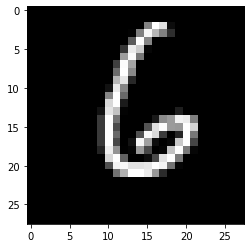

In [10]:
plt.imshow(img, cmap = 'gray')
plt.show()

## Pré-Processamento dos Dados

Um processo muito importante quando trabalhamos com Redes Neurais é o __Rescalamento__, pois é interessante que o os valores sejam rescalados **entre 0 e 1 para que o tempo de treinamento seja otimizado**. Não iremos enttrar em tantos detalhes sobre o motivo dessa otimização, mas [nesse link](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network) poderam ter mais detalhes sobre esse processo. 

Então, fazemos a divisão correpondentes aos pixels das imagens pelo pixel de valor máximo do **conjunto de treino**:

In [11]:
np.max(X_train)

255.0

In [12]:
X_train = X_train/255.0
X_test = X_test/255.0

Em modelos de rede neural de classificação, necessariamente **devemos ter o target transformado em variáveis dummy**, pois nossa resposta precisa ter a estrutura de output correta, como vimos na animação (GIF) acima. Podemos fazer isso com o __OneHot Encoder__, como já vimos anteriormente.<br><br>

Esse tipo de mapeamento é um vetor com a mesma quantidade de classes existentes, com cada posição desse vetor correspondendo a uma das classes. (No nosso caso, como temos 10 classes possíveis, este vetor terá 10 elementos!)

In [13]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
# Carrega o OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [15]:
# Instancia o OHEncoder
hot = OneHotEncoder()

In [16]:
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.fit_transform(y_test.reshape(-1, 1)).toarray()

In [17]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Conjunto de Validação

Em modelos de rede neural, é importante que exista um terceiro conjunto além de treino e teste, o **conjunto de validação**.

Durante o treinamento, a depender do caso, **risco de ocorrer overfitting é bastante alto**.

Uma forma de verificar e evitar isso é por meio do conjunto de validação, o qual é um subconjunto do conjunto de treino que não é utilizado pelo otimizador.  

Espera-se que a o valor da função de perda (loss) vá diminuindo a cada época, tanto para o conjunto de treino como para o conjunto de validação. Porém, se a função de perda diminui para o conjunto de treino e aumenta para o conjunto de validação (ocorrendo assim um descolamento), podemos concluir que está ocorrendo um overfitting para o conjunto de treino.

Deve-se então interromper o processo de treinamento. Esse comportamento pode ser visto com mais facilidade nos próximos tópicos.

Para fazer a divisão, usamos a função ``train_test_split`` do ``sklearn`` e definimos que o conjunto de validação será 10% do conjunto de treino.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.1,
                                                  random_state = 42,
                                                  stratify = y_train)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape)

(54000, 784) (6000, 784) (10000, 784)


In [21]:
print(y_train.shape, y_val.shape, y_test.shape)

(54000, 10) (6000, 10) (10000, 10)


## Arquitetura da Rede

Faremos uma rede simples, com:

- **3 camadas ocultas**;
- **25 neurônios cada**; 
- **Camadas densas**;
- **função de ativação ReLu nas camadas escondidas**;
- **10 neurônios e ativação Softmax na camada de saída**. 

Para a construção da rede neural, utilizaremos a biblioteca [Keras](https://keras.io/).

Primeiro definimos que nossa rede é do tipo **sequencial**, utilizando a função ``Sequential()``. 

O Keras funciona de forma super intuitiva: construímos **a arquitetura** de nossa rede neural camada a camada, construindo assim a rede neural da forma que queiramos!

[Clique aqui](https://keras.io/api/layers/) para conhecer melhor sobre a estrutura de camadas do Keras, e dar uma olhada nas camadas disponíveis!

Dessa forma, utilizamos o método ``.add()`` para adicionar as camadas, uma após a outra, de forma que a saída da camada anterior camada seja a entrada da próxima camada. 

> A primeira camada adicionada é uma **camada densa (fully connected)** com 25 neurônios. Para isso, é usada a função ``Dense()``, que conecta todos os valores de input e todos o neurônios da camada. 
Na primeira camada, é necessário **definir a dimensão dos dados de entrada**. Em camadas subsequentes isso não será necessário, já que o Keras automaticamente determinará que a dimensão de entrada será a dimensão da saída da camada anterior. 
No caso da rede em questão, os **784 pixels da imagem estarão todos conectados, um a um, aos 25 neurônios da primeira camada, produzindo 25 saídas nessa camada**.

> Após a camada densa, é necessário inserir **a camada de ativação**, por meio da função ``Activation()``. Ao usar essa função, é necessário definir qual função de fato será usada passando uma string como parâmetro pra função. Dentre as disponíveis no Keras estão ``'tanh'``, ``'sigmoid'``, ``'softmax'`` e ``'relu'``. Nessa camada, a `ReLu` será usada.

Esse processo de ``Dense()`` e ``Activation()`` é repetido mais duas vezes com os mesmos parâmetros. 

> Posteriormente, por ser um problema de classificação com 10 classes diferentes, é importante que a **a camada de saída possua 10 neurônios**. Dessa forma, cada neurônio representará uma classe, e a predição final será a correspondente ao neurônio **com maior valor de saída**. 
Outro fator importante é o uso de uma **camada de ativação Softmax após essa última camada com 10 neurônios**. 
A ativação Softmax funciona como uma versão mais generalizada da função sigmóide (ou logística), usada para **predições multiclasse**
Ou seja, com valores entre 0 e 1, a saída de cada neurônio pode ser interpretada como a **probabilidade daquela instância pertencer àquela classe**.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [23]:
# Instancia a Rede
rede_simples = Sequential()

# Definindo camada de input e primeira camada oculta
rede_simples.add(Dense(25, 
            input_dim = X_train.shape[1]))
rede_simples.add(Activation('relu'))

# Definir segunda camada oculta
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))

# Definir terceira camada oculta
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))

# Camada de output
rede_simples.add(Dense(y_train.shape[1]))
rede_simples.add(Activation('softmax'))

A rede então deve ser compilada usando o método ``compile()``. Devem ser passados a [função de perda](https://keras.io/losses/) e o [otimizador](https://keras.io/optimizers/) a serem utilizados. 

Para a função de perda, usamos ``categorial_crossentropy`` por ser um **problema de classificação multiclasse** (não binário). 

Já o otimizador escolhido foi o ``RMSprop()``.

Diferentes funções de perda possuem diferentes propósitos, devendo ser escolhido caso a caso. Já os otimizadores possuem maior liberdade de escolha, não existindo uma regra fechada.

Artigo sobre `RMSprop`: [aqui](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)

Artigo sobre o Gradiente descendente, Adam e outros métodos: [aqui](https://towardsdatascience.com/how-do-we-train-neural-networks-edd985562b73)

A arquitetura da rede pode ser visualizada com o método ``.summary()``.

In [24]:
from tensorflow.keras.optimizers import RMSprop

In [25]:
rede_simples.compile(loss = 'categorical_crossentropy',
                     optimizer = RMSprop())

pesos_iniciais = rede_simples.get_weights()

rede_simples.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 activation_1 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 activation_2 (Activation)   (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

In [26]:
pesos_iniciais

[array([[-0.05610178,  0.06932236,  0.01354674, ..., -0.06273577,
         -0.00868469, -0.00349364],
        [-0.01585738,  0.00336281, -0.07794674, ...,  0.01405691,
          0.06599359, -0.07288621],
        [ 0.02544114,  0.04337551,  0.0331177 , ..., -0.01878059,
          0.05637045, -0.07593994],
        ...,
        [ 0.0644033 ,  0.01789855,  0.04494216, ...,  0.07180269,
         -0.07041362, -0.00958974],
        [-0.04690354,  0.04072788, -0.07689659, ..., -0.07185712,
          0.02389632, -0.04546113],
        [-0.07582018,  0.03367961,  0.08580136, ..., -0.04066466,
         -0.0461462 ,  0.06869549]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.11045058,  0.13109979, -0.00876749, -0.29376236, -0.13952413,
         -0.08614913, -0.07022399,  0.11188954, -0.10328874,  0.02320623,
          0.05287403, -0.16603844, -0.0343653 ,  0.1098797 ,  0.14936355,
   

## Treinamento

Agora vem a parte de treinamento da rede neural. Para isso, basta usar o método ``.fit()`` e definir a quantidade de epochs, conjunto de treino e conjunto de validação. O parâmetro ``verbose`` define se informações de treinamento devem ser exibidas na tela a cada epoch.

In [27]:
historico = rede_simples.fit(X_train,
                             y_train,
                             epochs = 100,
                             verbose = 1,
                             validation_data = (X_val, y_val))

Epoch 1/100
1688/1688 [==============================] - 2s 945us/step - loss: 0.4056 - val_loss: 0.2417
Epoch 2/100
1688/1688 [==============================] - 1s 849us/step - loss: 0.2107 - val_loss: 0.1988
Epoch 3/100
1688/1688 [==============================] - 1s 844us/step - loss: 0.1759 - val_loss: 0.1823
Epoch 4/100
1688/1688 [==============================] - 1s 864us/step - loss: 0.1566 - val_loss: 0.1730
Epoch 5/100
1688/1688 [==============================] - 1s 861us/step - loss: 0.1426 - val_loss: 0.1801
Epoch 6/100
1688/1688 [==============================] - 2s 896us/step - loss: 0.1308 - val_loss: 0.1736
Epoch 7/100
1688/1688 [==============================] - 1s 862us/step - loss: 0.1226 - val_loss: 0.1688
Epoch 8/100
1688/1688 [==============================] - 1s 849us/step - loss: 0.1147 - val_loss: 0.1481
Epoch 9/100
1688/1688 [==============================] - 1s 862us/step - loss: 0.1100 - val_loss: 0.1675
Epoch 10/100
1688/1688 [==============================]

O que está acontecendo acima?

O treinamento de uma rede neural (e de todo modelo de machine learning, na verdade) consiste em um **problema de otimização**, em que queremos encontrar **o valor mínimo da função de perda**

No nosso caso, a função de perda é a "__categorical crossentropy__, cuja expressão matemática é:

$$ L(y, \hat{y}) = - \sum_i{y_i \log \hat{y}_i}$$, 

onde $\hat{y}$, a previsão do modelo, é uma expressão bem complicada, que relaciona todos os pesos e funções de ativação de toda a rede neural.

Como mencionamos, as redes neurais utilizam o procedimento de **Backward Propagation** em seu treinamento (cujo objetivo é **determinar os pesos**):

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width=600>

Matematicamente, o Backward Propagation é implementado através de algum **método de otimização**, com o fim de **determinar os pesos que minimizam a função de perda**. O principal método utilizado para este fim é o **gradiente descendente**:

<img src="https://thumbs.gfycat.com/AngryInconsequentialDiplodocus-size_restricted.gif" width=1000>

Então, o que está acontecendo acima, é que **em cada epoch**, o Keras faz o Forward Propagation, avalia as predições, e depois segue com o Backward Propagation para atualizar os pesos. Este processo é realizado pelo número de vezes (epochs) que determinarmos!

Após o __modelo treinado__, agora devemos **fazer predições** e **avaliar a performance**:

In [28]:
y_pred = np.argmax(rede_simples.predict(X_test), 
                   axis = 1)
y_pred

313/313 [==============================] - 0s 535us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
y_test = np.argmax(y_test, axis = 1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.97      0.98      1135
           2       0.97      0.94      0.96      1032
           3       0.93      0.95      0.94      1010
           4       0.98      0.95      0.96       982
           5       0.96      0.95      0.95       892
           6       0.97      0.97      0.97       958
           7       0.94      0.96      0.95      1028
           8       0.92      0.95      0.93       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



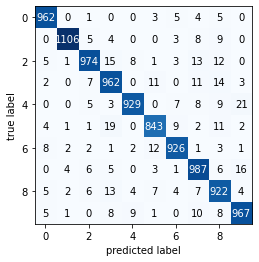

In [31]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat = cm)
plt.show()

O modelo teve uma performance muito boa, com uma acurácia de 96%, mas algumas coisas devem ser observadas a partir desse resultado como por exemplo a possibilidade de __Overfitting!__

O **Overfitting** é algo que pode ser bastante comum em redes neurais se não for bem tratado, porque ele é um modelo altamente não linear. Relembrando, o overfitting está intimamente relacionado com o tradeoff viés-variância:

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=600>

Podemos visualizar esta característica em nosso modelo ao **plotar** o valor da **função de perda** a cada epoch:

In [32]:
# loss e val_loss
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))

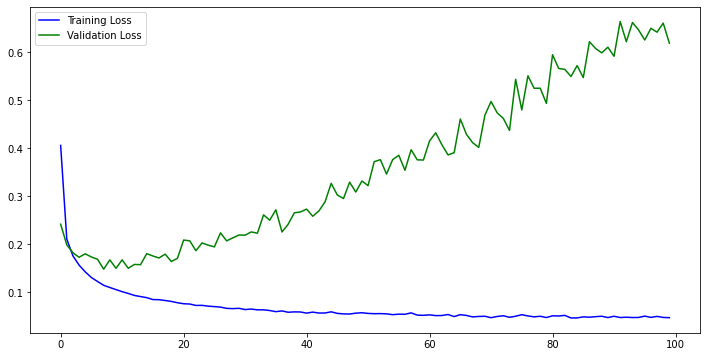

In [33]:
plt.figure(figsize = (12, 6))
plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'green', label = 'Validation Loss')
plt.legend()
plt.show()

Pelo gráfico, é possível perceber que mais ou menos a partir da 15ª época a função de perda continuou decrescedo pro conjunto de treinamento, mas no conjunto de validação isso se manteve fixo por um tempo e depois começou a perder desempenho.

A curva acima é muito parecida com o nosso exemplo do tradeoff vié-variância, não é mesmo?!

Temos, portanto, um forte indício que está começando a ocorrer overfitting!

Para evitarmos isso, pode ser interessante que o **treinamento seja interrompido antes do overfitting começar a ocorrer**! Esta técnica é conhecida como **early stopping**:
<br><br>

### Early Stopping

Para interromper um treinamento, podemos usar o callback de ``EarlyStopping()``. Esse callback pode receber alguns parâmetros, como o que ele deve monitorar (``monitor``), a diferença mínima que deve ser considerada pra ser um avanço (``min_delta``) e a quantidade de épocas que devem se manter sem avanço até de fato interromper o treinamento (``patience``). No exemplo a seguir, estamos monitorando a função de perda do conjunto de validação, consideramos um avanço mínimo o valor de 0.001 e paciência de 10 épocas. 

Ou seja, **se a função de perda na validação não tiver uma redução de pelo menos 0.001 por 10 épocas**, o treinamento será interrompido.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 
                           0.001,
                          patience = 10,
                          verbose = 1,
                          mode = 'auto')

In [35]:
# Retomando as valores de pesos iniciais igual ao primeiro treinamento
rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(X_train,
                             y_train,
                             epochs = 100,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks = [early_stop])

Epoch 1/100
1688/1688 [==============================] - 1s 871us/step - loss: 0.4224 - val_loss: 0.2426
Epoch 2/100
1688/1688 [==============================] - 1s 863us/step - loss: 0.1928 - val_loss: 0.1850
Epoch 3/100
1688/1688 [==============================] - 1s 866us/step - loss: 0.1576 - val_loss: 0.1663
Epoch 4/100
1688/1688 [==============================] - 1s 861us/step - loss: 0.1396 - val_loss: 0.1642
Epoch 5/100
1688/1688 [==============================] - 1s 865us/step - loss: 0.1254 - val_loss: 0.1645
Epoch 6/100
1688/1688 [==============================] - 1s 875us/step - loss: 0.1169 - val_loss: 0.1579
Epoch 7/100
1688/1688 [==============================] - 1s 870us/step - loss: 0.1092 - val_loss: 0.1658
Epoch 8/100
1688/1688 [==============================] - 1s 870us/step - loss: 0.1038 - val_loss: 0.1781
Epoch 9/100
1688/1688 [==============================] - 1s 863us/step - loss: 0.0994 - val_loss: 0.1609
Epoch 10/100
1688/1688 [==============================]

É possível perceber que o treinamento foi interrompido pouco depois da __epoch 15__, bem antes do total de epochs definido inicialmente. Vamos agora fazer predições e avaliar o modelo:

In [36]:
# loss e val_loss
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))

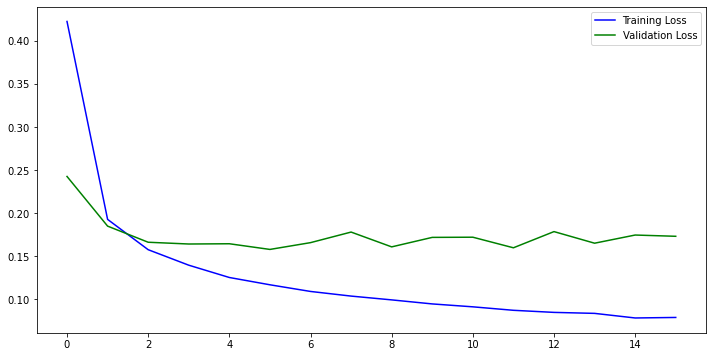

In [37]:
plt.figure(figsize = (12, 6))
plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'green', label = 'Validation Loss')
plt.legend()
plt.show()

In [38]:
y_pred = np.argmax(rede_simples.predict(X_test), axis = 1)
y_pred

313/313 [==============================] - 0s 548us/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.92      0.98      0.95       982
           5       0.97      0.94      0.95       892
           6       0.96      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.94      0.95       974
           9       0.97      0.92      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



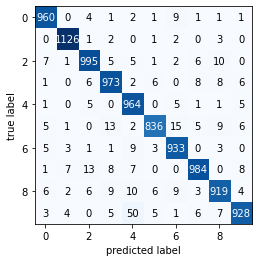

In [40]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat = cm)
plt.show()

Agora garantindo que não houvesse o deslocamento entre o __treino__ e a __validação__ obtemos uma resultado muito bom para o nosso modeolo, e isso é um forte indicativo de que o Early Stopping ajudou a evitar o Overfitting.

Vimos acima uma forma de evitar o Overfitting em Redes Neurais, mas esta definitivamente não é a única maneira! Existem inúmeras técnicas para mitigar este problema, entre elas a aplicação de **técnicas de regularização** (leia sobre isso [aqui](https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3) e [aqui](https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709))), cuja implementação existe no Keras! (mais informações [aqui](https://keras.io/api/layers/regularization_layers/) e [aqui](https://keras.io/api/layers/regularizers/)))

##   

## Exercício

__1)__ Refaça o exercício exemplo da aula para fixar conceitos!

__2)__ Preencha os códigos nos __locais indicados!!!__

O exercicio será montar uma Rede Neural de uma importante base de dados, muito conhecida também, chamada de __Fashion MNIST__, onde queremos classificar roupas em algumas categorias. Está base de dados contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [41]:
# TensorFlow e tf.keras
import tensorflow
import keras

# Bibliotecas Auxiliares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#Baixando a nossa base de dados

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Carregamos 4 arrays NumPy divididos em treino e teste, e além disso as imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>


In [43]:
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

In [44]:
train_images.shape

(60000, 28, 28)

In [45]:
len(train_labels)

60000

In [46]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [47]:
test_images.shape

(10000, 28, 28)

In [48]:
len(test_labels)

10000

## Pré-Processamento dos Dados

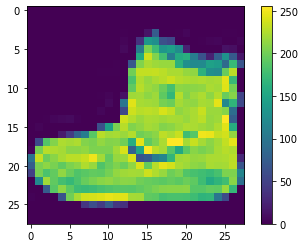

In [49]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
# Reshape

#Faça o reshape da train_images dividindo por 255. e salvando na mesma variavel
### COLOQUE SEU CODIGO AQUI ###
train_images = train_images/255.0

#Faça o reshape da test_images dividindo por 255. e salvando na mesma variavel
### COLOQUE SEU CODIGO AQUI ###
test_images = test_images/255.0

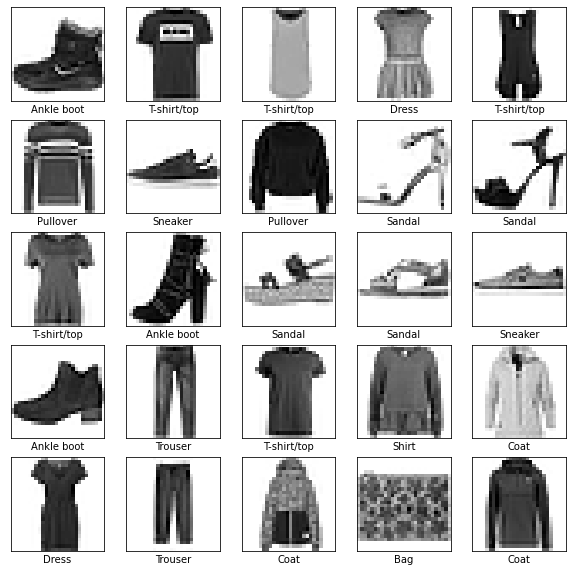

In [51]:
# alguns plots da base de teste

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
# Uma outra forma de criarmos a Rede Neural camada a camada é da seguinte forma:

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])

In [53]:
# Crie um compile() com os seguintes parametros:
# optimizer = 'adam'
# loss = 'sparse_categorical_crossentropy'
# metrics=['accuracy']

### COLOQUE SEU CODIGO AQUI ###
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# Crie o summary() para o modelo
### COLOQUE SEU CODIGO AQUI ###
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Faça o fit do modelo passando train_images, train_labels e epochs = 10
### COLOQUE SEU CODIGO AQUI ###
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 2s 949us/step - loss: 0.5044 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.3796 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.3400 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 2s 945us/step - loss: 0.3151 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.2962 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 2s 958us/step - loss: 0.2827 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.2685 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.2582 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.2489 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 950u

In [55]:
# Avaliando a acurácia no teste

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3382 - accuracy: 0.8843 - 290ms/epoch - 927us/step

Test accuracy: 0.8842999935150146


In [57]:
pred_labels = np.argmax(model.predict(test_images), axis = 1)
pred_labels

313/313 [==============================] - 0s 619us/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [58]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Faça o print do classification_report para pred_labels e test_labels
### COLOQUE SEU CODIGO AQUI ###
print(classification_report(pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1040
           1       0.98      0.97      0.97      1017
           2       0.78      0.82      0.80       956
           3       0.84      0.93      0.88       901
           4       0.86      0.76      0.81      1133
           5       0.95      0.98      0.97       976
           6       0.68      0.73      0.70       939
           7       0.98      0.91      0.94      1084
           8       0.97      0.97      0.97      1004
           9       0.93      0.98      0.95       950

    accuracy                           0.88     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.89      0.88      0.88     10000



Matriz de confusão do modelo nos dados de teste:



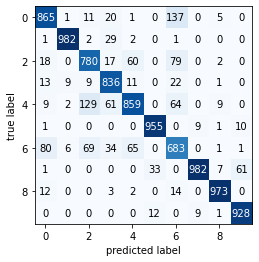

In [59]:
# Crie a matriz de confusão para o pred_labels e test_labels
### COLOQUE SEU CODIGO AQUI ###
cm = confusion_matrix(pred_labels, test_labels)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [60]:
# Trazendo a probabilidade de cada classe
predictions = model.predict(test_images)

313/313 [==============================] - 0s 637us/step


In [61]:
# Função para plotar as imagens

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Cria o gráfico com as probabilidades

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

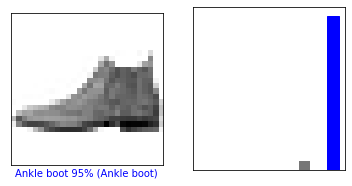

In [62]:
# Teste com o id = 1

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

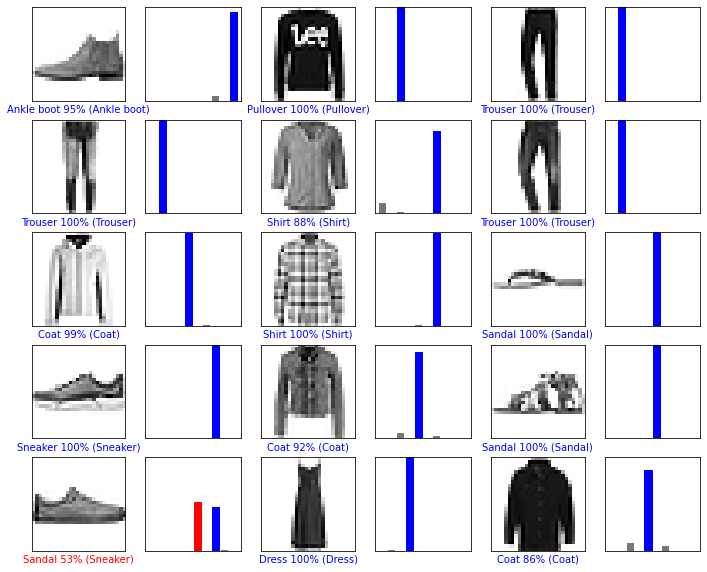

In [63]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()